In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

Vou usar como exemplo o Data set MNIST que contem imagens

Exibindo algumas imagens do dataset

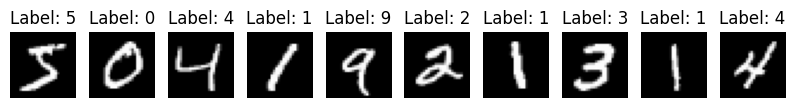

In [13]:
# Definir o número de imagens a serem exibidas
num_images = 10

# Plotar as primeiras 5 imagens do conjunto de treinamento
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_train[i], cmap='gray')  # Exibir imagem em tons de cinza
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')  # Desativar os eixos
plt.show()

#Como garantir que o programa aprenda bem com as fotos que mostramos?

- Utilizamos o dataset MNIST, que contém 60.000 imagens de treino e 10.000 imagens de teste, garantindo que o modelo veja uma grande variedade de exemplos.
-  As imagens são padronizadas dividindo os pixels por 255.0, o que melhora a eficiência do aprendizado.
- Escolhemos 50 épocas, permitindo que o modelo aprenda padrões sem sobreajustar (overfitting).

In [11]:
# 🔹 Carregando o MNIST Dataset
(X_mnist_train, y_mnist_train), (X_mnist_test, y_mnist_test) = keras.datasets.mnist.load_data()

# 🔹 Normalizando os dados (padronizando os pixels entre 0 e 1)
X_mnist_train = X_mnist_train / 255.0
X_mnist_test = X_mnist_test / 255.0

# 🔹 Criando o modelo Perceptron (Rede Neural Simples)
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Achata a imagem 28x28 para vetor 1D
    layers.Dense(128, activation = 'relu'), #camada oculta com 128 neuronios
    layers.Dense(10, activation='softmax')  # 10 neurônios (1 para cada dígito de 0 a 9)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#Como testar se o programa consegue classificar novas fotos corretamente?

-  O MNIST já possui 60.000 imagens para treino e 10.000 para teste, garantindo que as imagens de teste sejam novas para o modelo
- Após o treinamento, avaliamos o modelo com model.evaluate(X_mnist_test, y_mnist_test), que fornece a acurácia no conjunto de teste.
- e a acurácia no conjunto de teste for alta e próxima da acurácia no treino, significa que o modelo não sofreu overfitting e consegue classificar corretamente novas imagens

In [9]:
# 🔹 Compilação do modelo (otimizador, perda e métrica)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🔹 Treinamento do modelo
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
model.fit(X_train,y_train,epochs = 10)
# 🔹 Avaliação no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do Perceptron no MNIST: {accuracy * 100:.2f}%")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8173 - loss: 6.7391
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9084 - loss: 0.3628
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9258 - loss: 0.2798
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9361 - loss: 0.2441
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9411 - loss: 0.2326
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9476 - loss: 0.2057
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9506 - loss: 0.1952
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9524 - loss: 0.1857
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9538 - loss: 0.1819
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9559 - loss: 0.1758
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.2931
Acurácia do Perceptron no MNIST: 95.17%


- Podemos também fazer a validação manual gerando novas fotos e vendo se deu certo a predição no nosso caso funcionou bem

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


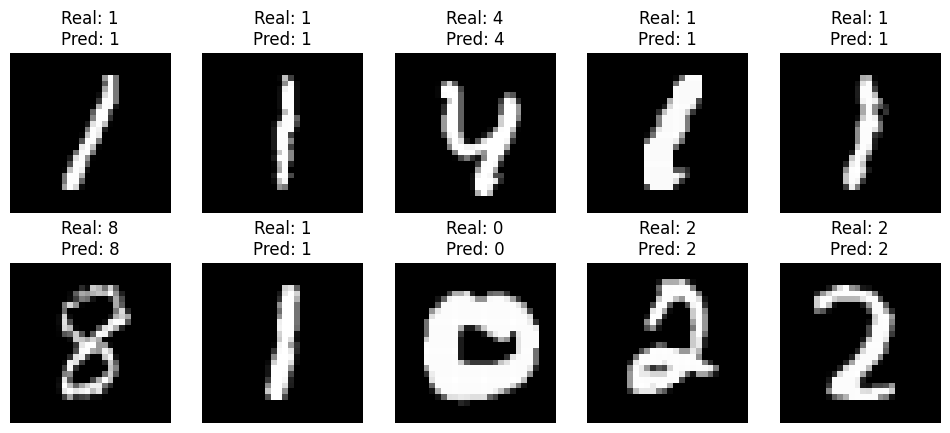

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Selecionar 10 imagens aleatórias do conjunto de teste
num_samples = 10
indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

# Obter as imagens e os rótulos reais
sample_images = X_test[indices]
sample_labels = y_test[indices]

# Fazer a predição usando o modelo treinado
predictions = model.predict(sample_images)

# Converter as previsões para classes (dígitos de 0 a 9)
predicted_labels = np.argmax(predictions, axis=1)

# Plotar as imagens com suas previsões
plt.figure(figsize=(12, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Real: {sample_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.show()
